In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
X= df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [ ]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.875


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[46  6]
 [ 4 24]]


<Axes: >

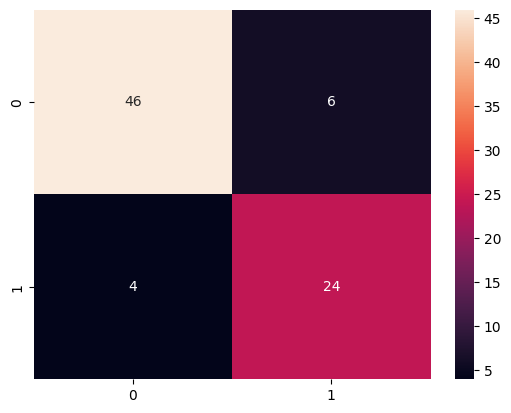

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot= True)

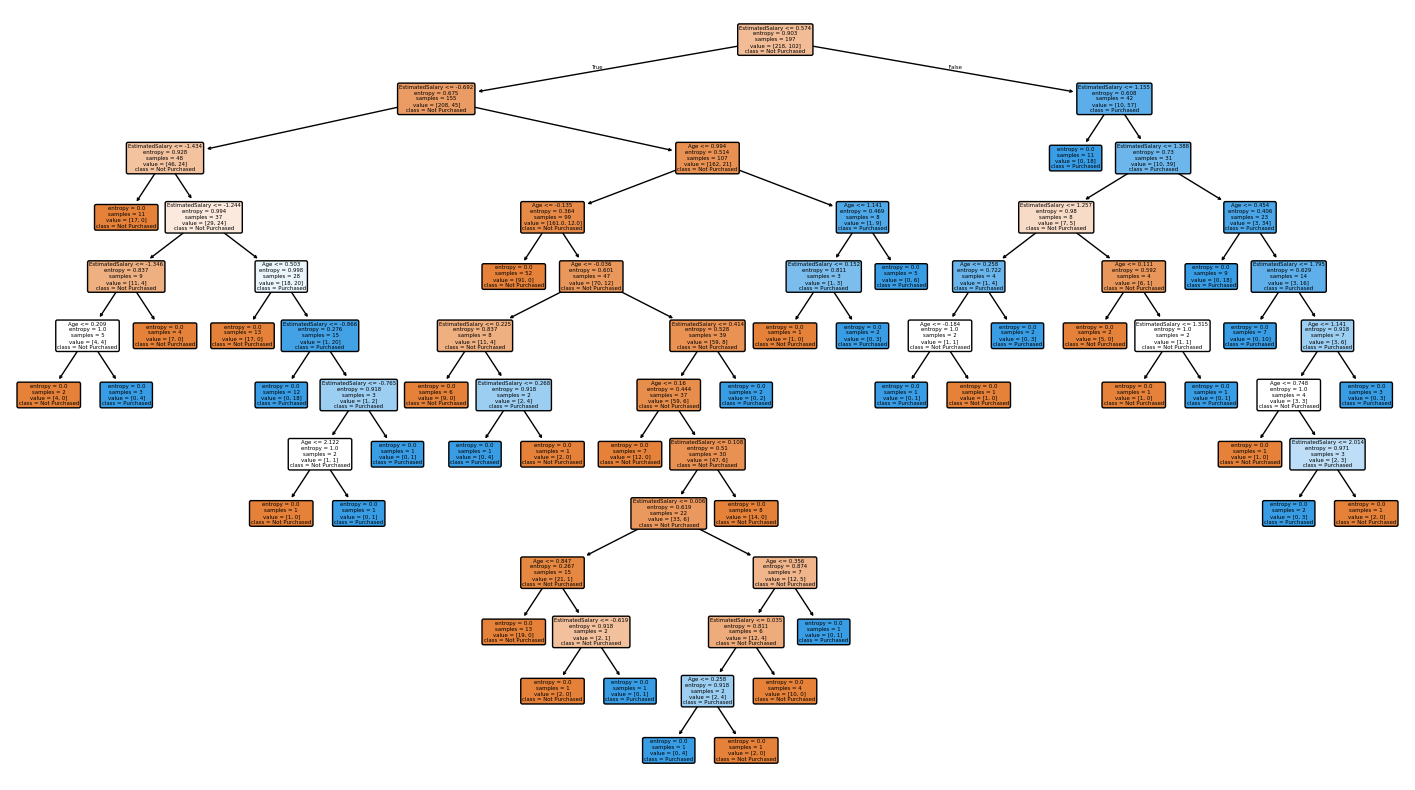

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

third_tree =classifier.estimators_[2]
plt.figure(figsize=(18,10))
plot_tree(third_tree,
          feature_names = ["Age","EstimatedSalary"],
          class_names = ["Not Purchased","Purchased"],
          filled = True,
          rounded = True)
plt.show()